![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import statsmodels.formula.api as smf

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()
bikes.describe()
print(bikes['season'])

datetime
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
2011-01-01 04:00:00    1
                      ..
2012-12-19 19:00:00    4
2012-12-19 20:00:00    4
2012-12-19 21:00:00    4
2012-12-19 22:00:00    4
2012-12-19 23:00:00    4
Name: season, Length: 10886, dtype: int64


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# El promedio de las estaciones de acuerdo a la información es para invierno (1): 116.34, primavera (2) 215.25, verano (3) 234.41 y otoño (4) 198.98
bikes.mean()
bikes.isnull().sum().sum()

# No existen datos nullos

bikes.describe()

# Existen 10886 registros
# describe() nos permite observar la media aritmetica por columna, ejemplo en la columna season es 2.50
# Tambien podemos observar los minimos y máximos de cada una de las variables, ejemplo: temp tiene un mínimo de 0.82 y un máximo de 41.00

bikes.mode()

# La moda para season es 4, es decir otoño es la estación que más se repite, las demás columnas se pueden observar en el despliegue

bikes.groupby("humidity").total.mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
0,4.0,0.0,1.0,1.0,14.76,31.06,88.0,0.0,0.0,3.0,5.0,12
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [ ]:
# Al agrupar el conjunto de datos por la columna y total, se puede observar por cada una de las horas el núero de bicicletas
# se arriendan. Ejemplo a las 5:00 pm el valor total es 468

In [107]:
bikes.groupby('hour').total.max()

hour
0     283
1     168
2     119
3      66
4      28
5      57
6     213
7     596
8     839
9     414
10    539
11    647
12    757
13    729
14    730
15    724
16    783
17    970
18    977
19    743
20    551
21    584
22    502
23    256
Name: total, dtype: int64

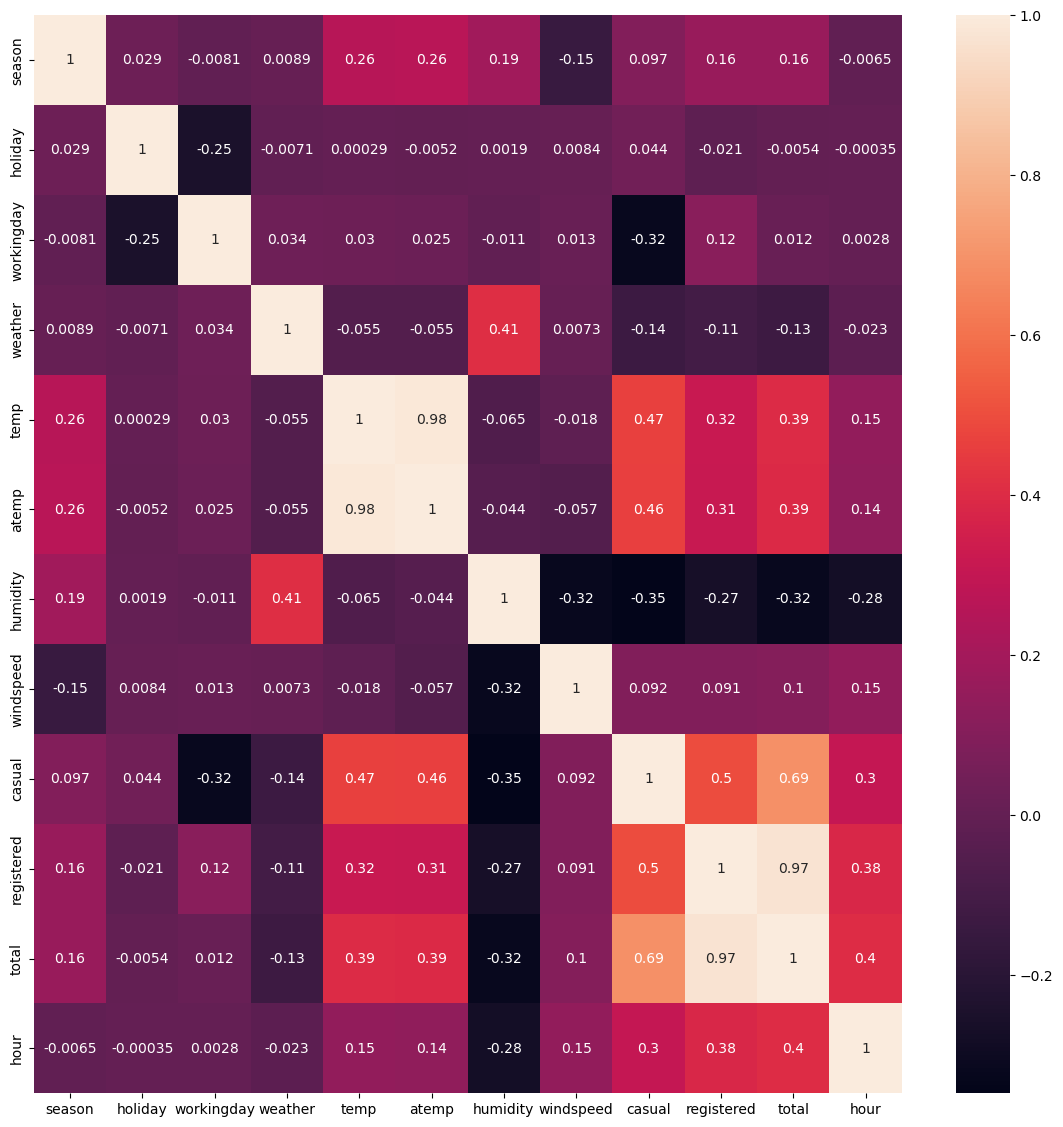

In [7]:
corr_bikes=bikes.corr(method='pearson')
plt.figure(figsize=(14, 14))
sns.heatmap(corr_bikes, annot=True)
plt.show()

In [ ]:
# las variables que muestran mayor correlación son: casual y total con 0.69, atem (Sensación Temperatura normalizada) 0.46 y 
# casual, temp (temperatura) y total 0.47

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

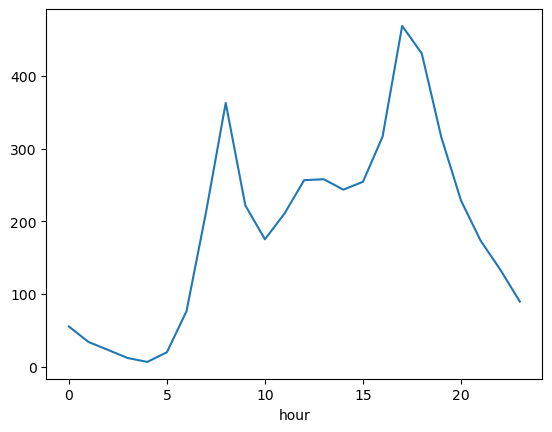

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

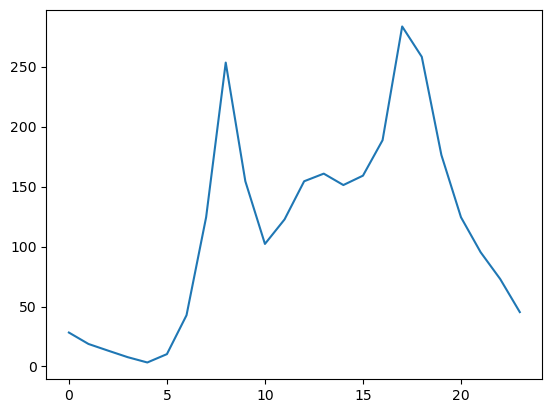

In [14]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes1=bikes[bikes['season']==1]
bikes_1t=bikes1.groupby('hour').total.mean()
plt.plot(bikes_1t.values)
plt.show()

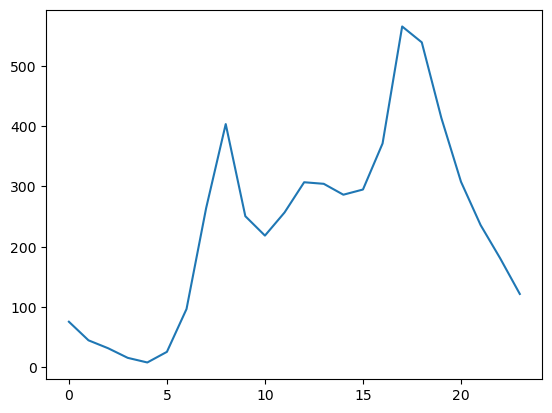

In [16]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes3=bikes[bikes['season']==3]
bikes_3t=bikes3.groupby('hour').total.mean()
plt.plot(bikes_3t.values)
plt.show()

In [20]:
# Análisis
# Las horas donde mayor uso de las bicicletas rentadas en promedio se realiza es en la mañana a las 7:30 a.m, y en la tarde 
# hacia las 17 horas, es decir las 5:00 p.m.
# Este comportamiento con respecto a las horas puede ser explicado por coincidir con las horas laborales, de desplazamiento hacia
# la oficina y en la tarde hacia los sitios de transporte para regresar a la casa. En las tres (3) gráficas las horas no cambian
# Sin embargo el número de bicicletas rentadas en promedio por estación (invierno=1, verano=3),si muestra un aumento en verano.
# Mientras en el invierno en la mañana se estima un valor de 280 y 280 en la tarde, para la estación de verano estos valores son:
# 400 en la mañana y 600 en la tarde, este comportmiento es logico pues en esta última estación el clima es propicio para 
# usar bicicleta y además aprobechar para un uso recreativo y no solo de transporte para llegar al trabajo

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [21]:
# Celda 3
modelo=smf.ols('total~season+hour', data=bikes)
resultado=modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1260.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:13:49   Log-Likelihood:                -70912.
No. Observations:               10886   AIC:                         1.418e+05
Df Residuals:                   10883   BIC:                         1.419e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5849      4.662      0.554      0.579      -6.553      11.723
season        26.9513      1.402     19.226      0.000      24.203      29.699
hour          10.5213      0.226     46.504      0.000      10.078      10.965
==============================================================================
Omnibus:                     2309.869   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4579.725
Skew:                           1.279   Prob(JB):                         0.00
Kurtosis:                       4.886   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# El intercepto con el eje "Y" es 2.5849 
# el coeficiente de "season" es 26.915 y el de "hour" 10.5213
# Sin embargo por ser 'seaso' una variable categorica no es aplicable a problemas de regresión y esto es una 
# limitante para aplicar en estos casos

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

<Axes: xlabel='hour', ylabel='total'>

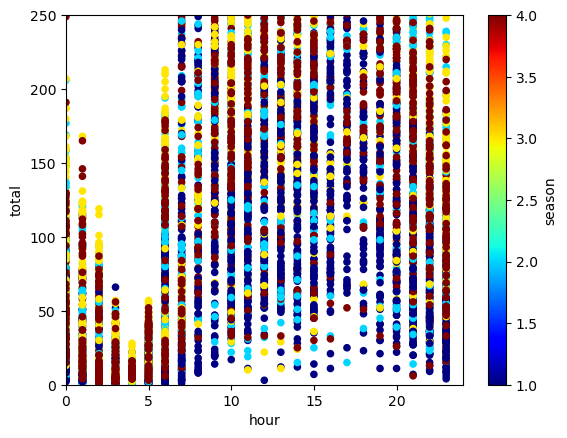

In [23]:
# Celda 4
bikes.dropna(inplace=True)
bikes.plot(kind='scatter', x='hour', y='total', c='season', colormap='jet', xlim=(0, 24), ylim=(0, 250))

In [24]:
# Variables predictoras
var_predictoras=bikes[['hour', 'season']]
x=var_predictoras

In [27]:
# Sepración de variables predictoras (x) y variables de interés (y)
bikes.total.describe()
y=bikes['total']

In [25]:
# Definición de parámetros y criterios de parada
max_depth=None
num_pct=10
max_features=None
min_gain=0.001

In [28]:
# Impresión variables usar
j=1
#print(x[j])

In [ ]:
# Divisón de la variable total
#splits=np.percentile(x.loc[:,j], np.arange(0,100,100.0/num_pct).totlist())

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [29]:
# Celda 5
max_depth_range=range(1,21)
accuracy_scores=[]

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Ciclo para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, x, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

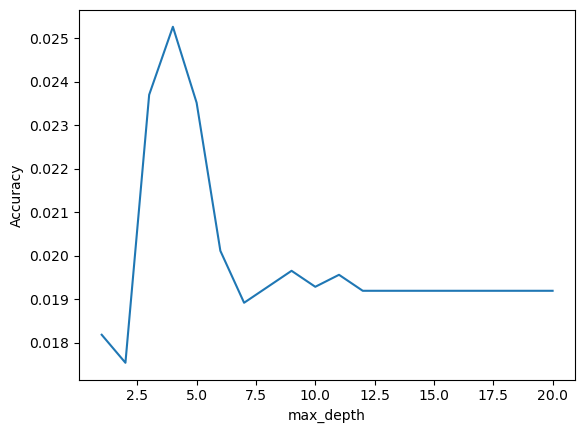

In [30]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [31]:
# Mejor accuracy
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.025261134067952253, 4)

In [32]:
# max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(x, y)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [33]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, x, y, cv=10)).describe()

count    10.000000
mean      0.025261
std       0.006956
min       0.015611
25%       0.020436
50%       0.026183
75%       0.029865
max       0.034894
dtype: float64

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [34]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [35]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [36]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [37]:
# Celda 6
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test=X_test

models={'lg':LogisticRegression(), 'dt':DecisionTreeRegressor()}

# Entrenamiento (fit)

for model in models.keys():
    models[model].fit(X_train, y_train)

In [38]:
y_pred = pd.DataFrame(index=test.index, columns=models.keys())

for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

lg 0.6207522318391883
dt 0.6733003292241385


In [40]:
np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

0.5636192568273964

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar desempeño regresión logistica
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy, precision, recall, f1)

0.6146666666666667 0.6219178082191781 0.6005291005291006 0.6110363391655451


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [49]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# 100 muestras

n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [52]:
# Entrenamiento

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [53]:
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1782,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,0,0,0,1,1,0
3917,0,1,0,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
221,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
2135,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5224,1,0,1,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [54]:
# Impresión
y_pred_df.sum(axis=1)[:10]

1782    62
3917    45
221     44
2135    22
5224    27
1168    40
879     18
156     25
1657    62
323     23
dtype: int64

In [55]:
# Votación
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.6459689534301452

In [56]:
# Desempeño
metrics.accuracy_score(y_pred, y_test)

0.6429292929292929

# 100 árboles y un max_depth elegido

In [100]:
# Número de proporciones
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,3000,0.5
0,3000,0.5


In [101]:
# Creación de las muestras
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [102]:
# Entrenamiento
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=10, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [103]:
# Predicciones

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1782,1,1,0,1,1,0,0,1,1,0,...,0,1,1,1,1,0,0,0,0,1
3917,0,1,0,0,0,1,1,0,0,1,...,0,1,0,1,1,1,0,1,0,0
221,0,0,1,1,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,1
2135,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5224,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
# Impresión de la cantidad de modelos
y_pred_df.sum(axis=1)[:10]

1782    54
3917    50
221     28
2135    13
5224    17
1168    24
879     15
156      6
1657    57
323     16
dtype: int64

In [105]:
# Votación Mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)
metrics.f1_score(y_pred, y_test)

0.65529352734571

In [106]:
# desempeño

metrics.accuracy_score(y_pred, y_test)

0.6530303030303031

# 100 árboles con min_samples elegido

In [64]:
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,3000,0.5
0,3000,0.5


In [66]:
n_estimators = 100
np.random.seed(123)

n_samples = 10
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [68]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [69]:
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1782,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3917,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
221,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2135,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
5224,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


In [70]:
y_pred_df.sum(axis=1)[:10]

1782    100
3917     94
221      91
2135     87
5224     90
1168     93
879      90
156      93
1657     76
323      95
dtype: int64

In [72]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)
metrics.f1_score(y_pred, y_test)

0.6724773717733824

In [73]:
metrics.accuracy_score(y_pred, y_test)

0.5065656565656566

# 100 árboles Regresiones Logísticas

In [86]:
# Crear 100 regresiones logística
# Crear 100 regresiones logísticas
regLogs = []
for i in range(100):
    regresionLog = LogisticRegression()
    regLogs.append(regresionLog)

# Entrenar las regresiones logísticas con datos de entrenamiento
for regresionLog in regLogs:
    regresionLog.fit(X_train, y_train)

# Evaluar las regresiones logísticas con datos de prueba
scores = []
for regresionLog in regLogs:
    score = regresionLog.score(X_test, y_test)
    scores.append(score)
    
# Imprimir los puntajes promedio de las regresiones logísticas
print("Puntajes promedio:", sum(scores) / len(scores))

Puntajes promedio: 0.6181818181818174


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [93]:
# Celda 8

# 100 árboles con un max_depth = 5

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [94]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6523736600306279, 0.656060606060606)

In [95]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [96]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.647179487179487, 0.6525252525252525)

# 100 árboles con un min_samples elegido

In [97]:
# 100 árboles y min_samples = 10
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=10),
                        n_estimators=100, bootstrap=True, random_state=42,
                        n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6431451612903225, 0.6424242424242425)

In [98]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [99]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.632065775950668, 0.6383838383838384)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Votación Mayoritaria:

In [ ]:
# La mayoría de las métricas obtenidas oscilan alrededor de 0.6 de la siguiente forma:
# Votación mayoritaria:
# 100 árboles con max_depth = 10
# F1 = 0.6459
# Accuracy = 0.6429

In [ ]:
# Votación mayoritaria:
# min_samples = 10
# F1 = 0.6724
# Accuracy = 0.5065

In [ ]:
# Votación Mayoritaria
# Regresión Logistica
# Promedio = 0.618181

### Votación Ponderada:

In [ ]:
# Con un max_depth = 5
# F1 = 0.6471
# Accuracy = 0.6525

In [ ]:
# Con un min_samples = 10
# F1 = 0.6320
# Accuracy = 0.6383

In [ ]:
# En general los modelos se comportan muy parecidos y sus métricas de evaluación del redimiento son buenas se encuentran por encima del 
# del umbral 0.5.

# Sin embargo, es importante anotar que en el caso de la votación mayoritaria con un min_samples = 10 el accuracy estuvo por
# debajo de los resultados de los otros modelos al registrar un valor de 0.5065, y es a su vez el único caso
# donde se puede observar un menor performance de este modelo en particular.

In [ ]:
# En general para este conjuunto de datos las predicciones son muy parecidas en ambos, sin embargo en la votación ponderada, se 
# requirió mayor procesamiento computacional para calcular el peso del modelo y esto aumenta su complejidad.